# Importing libraries

In [2]:
import math

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

# Getting dataset
### Dropping Jersey numbers so that they do not affect the clustering.
### Also dropping players that has under 100 appearences
### Saving numeric dataset to X and filling out NaN-values with 0.0

In [4]:
df = pd.read_csv('PL_players.csv')
df = df[df['Appearances'] > 100]
df.drop('Jersey Number', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
X = df.select_dtypes('number').copy()
X.fillna(0.0, inplace=True)

# Making pipeline and scaling

In [5]:
scaler = StandardScaler()
decomp = PCA(n_components=0.85)
cluster = KMeans(n_clusters=10)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.85)),
                ('kmeans', KMeans(n_clusters=10))])

## Creating a column for the different labels of the clusters

In [6]:
df['labels'] = pd.Series(pipe['kmeans'].labels_)

### Creating a dictionairy with inertia to be able to elbow plot.

In [7]:
inertia_dict = {'clusters':[], 'inertia':[]}

for i in range(2,11):
    scaler = StandardScaler()
    cluster = KMeans(n_clusters=i)
    pipe = make_pipeline(scaler, cluster)
    pipe.fit(X)
    inertia_dict['clusters'].append(i)
    inertia_dict['inertia'].append(pipe['kmeans'].inertia_)

inertia_df = pd.DataFrame(inertia_dict)

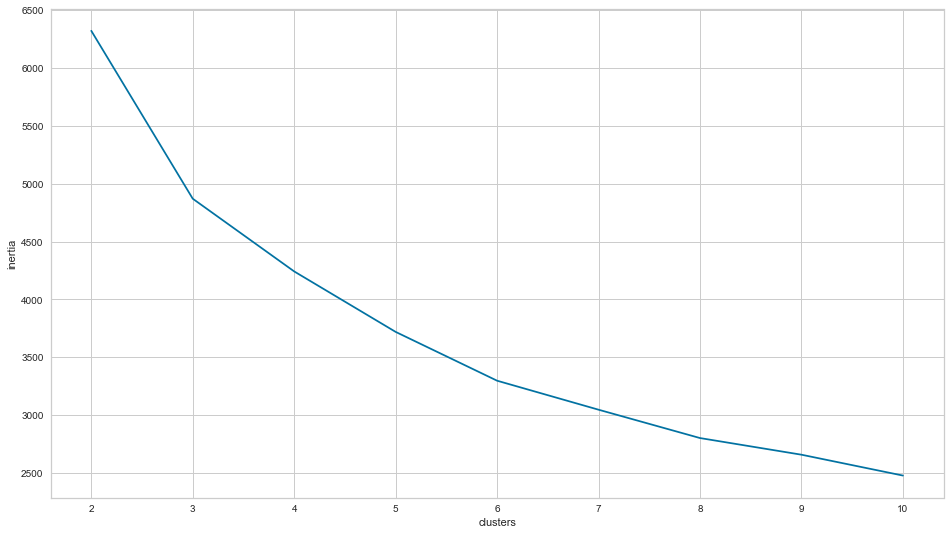

In [8]:
plt.figure(figsize=(16,9))
sns.lineplot(data=inertia_df, x='clusters', y='inertia')
plt.show()

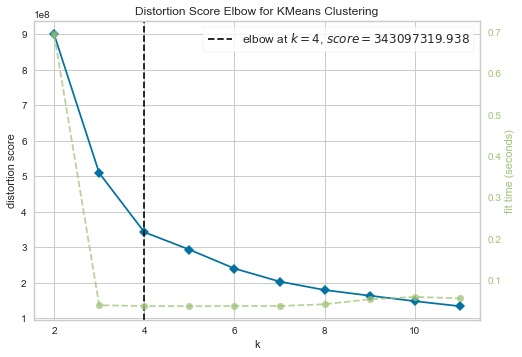

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
viz = KElbowVisualizer(pipe['kmeans'], k=(2,12))

viz.fit(X)
viz.show()

### Clustering and adding the clusters to a column

In [10]:
values = pipe[:2].transform(X)

pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))
df['clusters'] = pipe['kmeans'].labels_

df

/Users/Petter/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,clusters
0,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,NaN,...,8987.525167,2093.598680,5359.610089,7024.828359,7512.147161,10894.761685,6181.573778,3485.698396,14199.244781,6
1,Calum Chambers,Arsenal,Defender,England,25.0,139,47,57,6,NaN,...,8987.800480,2093.972419,5359.997587,7025.078041,7512.471382,10895.048620,6181.807821,3485.940448,14199.356639,8
2,David Luiz,Arsenal,Defender,Brazil,33.0,194,113,38,13,NaN,...,8986.246303,2092.510723,5358.602744,7023.494409,7510.955953,10893.497890,6180.211080,3484.347044,14197.661778,7
3,Mesut Özil,Arsenal,Midfielder,Germany,31.0,184,100,39,33,0.18,...,8986.383380,2092.067658,5358.113061,7023.739158,7510.901787,10893.575972,6180.494896,3484.597237,14198.345164,7
4,Granit Xhaka,Arsenal,Midfielder,Switzerland,27.0,132,70,33,8,0.06,...,8986.753622,2092.759413,5358.772515,7023.928458,7511.362706,10893.944262,6180.831443,3484.780319,14198.489683,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Jack Wilshere,West-Ham-United,Midfielder,England,28.0,182,87,52,8,0.04,...,8987.358388,2093.337427,5359.379047,7024.668742,7511.924737,10894.554075,6181.425045,3485.534613,14199.207181,6
150,Declan Rice,West-Ham-United,Midfielder,England,21.0,101,33,44,3,0.03,...,8988.722610,2094.793936,5360.711880,7025.734521,7513.347331,10895.906237,6182.835862,3486.608520,14200.421070,0
151,Michail Antonio,West-Ham-United,Forward,England,30.0,135,46,56,37,0.27,...,8988.739338,2094.556380,5360.656273,7026.118953,7513.301730,10895.967943,6182.723196,3486.989335,14200.517356,0
152,John Ruddy,Wolverhampton-Wanderers,Goalkeeper,England,33.0,119,33,54,0,NaN,...,8989.541634,2095.459916,5361.293093,7024.221624,7514.163147,10896.684505,6183.787169,3485.169964,14201.251033,9


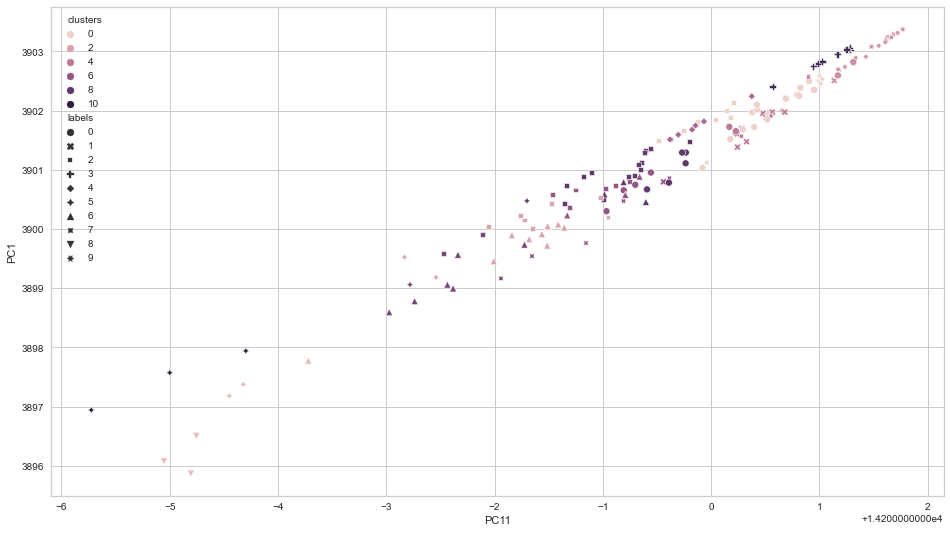

In [12]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='PC11', y='PC1', hue='clusters', style='labels')
plt.show()

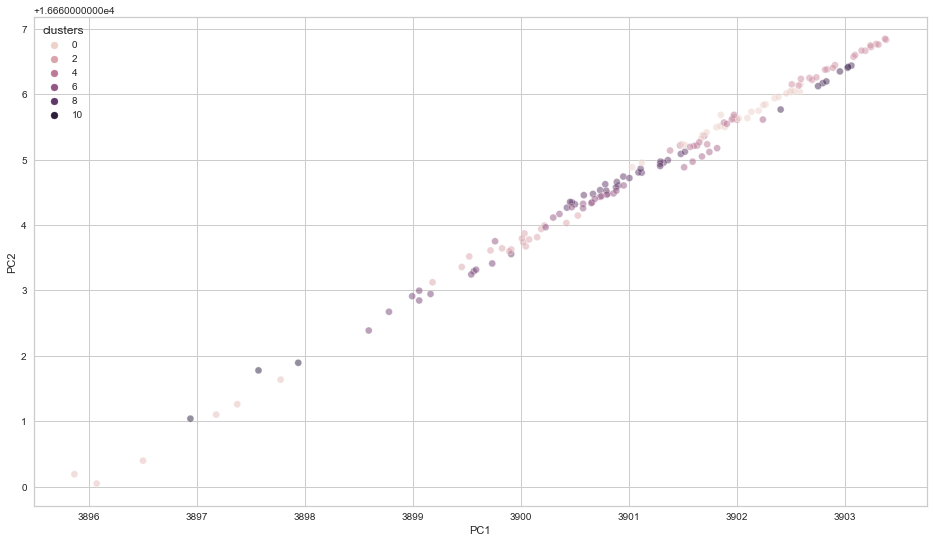

In [13]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='PC1', y='PC2', hue='clusters', alpha=0.5)
plt.show()

# EDA
### Analyzing the different clusters in barplots compairing different features

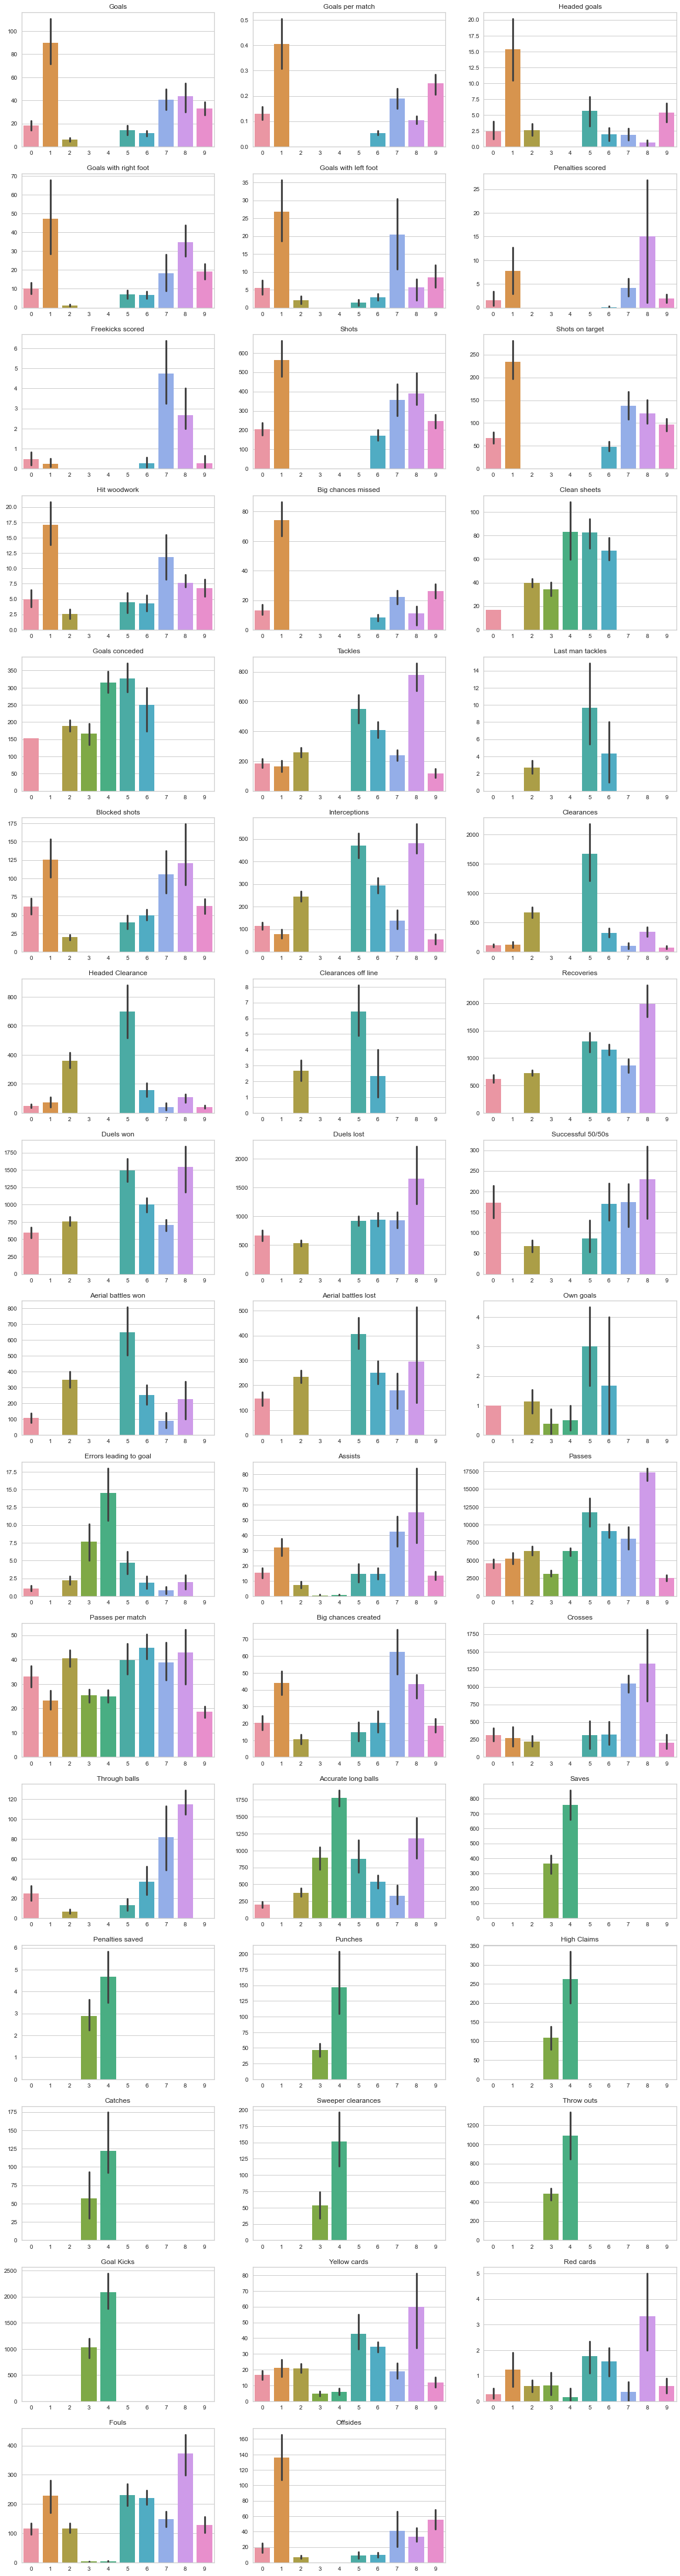

In [17]:
var_list = ['Goals', 'Goals per match', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target',
       'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded',
       'Tackles', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides']

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x="labels", y=i, ax=ax)
    ax.set(xlabel="", ylabel="", title=i)
    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()
    
plt.show()

# Renaming the clusters in a columns called 'Category'

In [79]:
df.loc[df['labels'] == 0, 'Category'] = 'Defensive playmaker'
df.loc[df['labels'] == 1, 'Category'] = 'Spearhead finisher'
df.loc[df['labels'] == 2, 'Category'] = 'Ball playing defender'
df.loc[df['labels'] == 3, 'Category'] = 'Goalkeeper'
df.loc[df['labels'] == 4, 'Category'] = 'Top performing goalkeeper'
df.loc[df['labels'] == 5, 'Category'] = 'Brickwall defender'
df.loc[df['labels'] == 6, 'Category'] = 'Ball winning box-to-box'
df.loc[df['labels'] == 7, 'Category'] = 'Offensive playmaker'
df.loc[df['labels'] == 8, 'Category'] = 'MVP'
df.loc[df['labels'] == 9, 'Category'] = 'Developing attacker'

# Plotting for more EDA

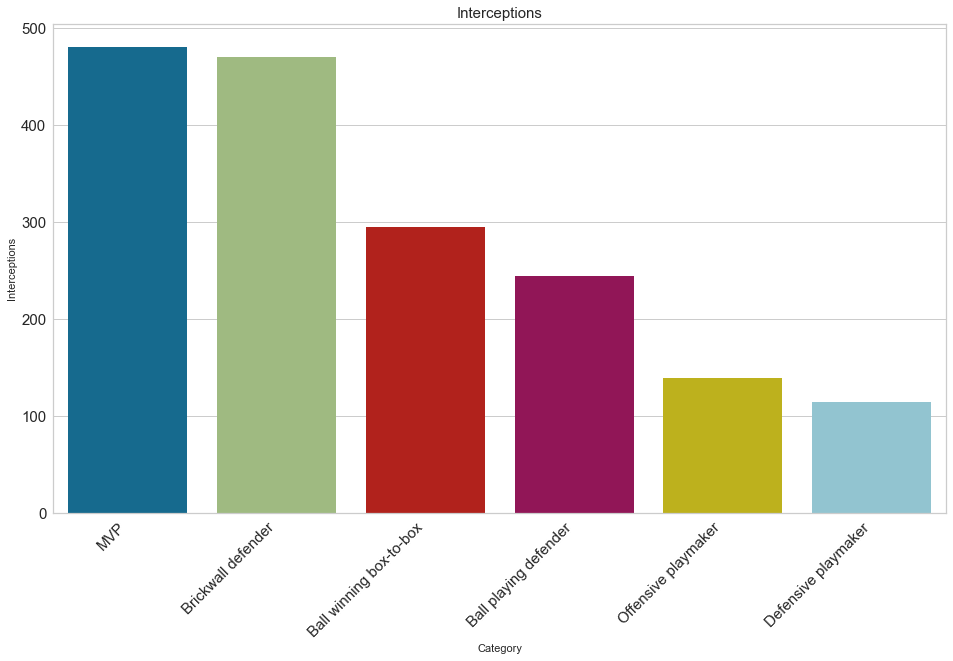

In [135]:
plt.figure(figsize=(16,9))
d = df.groupby('Category')['Interceptions'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=d.loc[:5], x='Category', y=d['Interceptions'], errwidth=False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.title('Interceptions', fontsize=15)
plt.show()

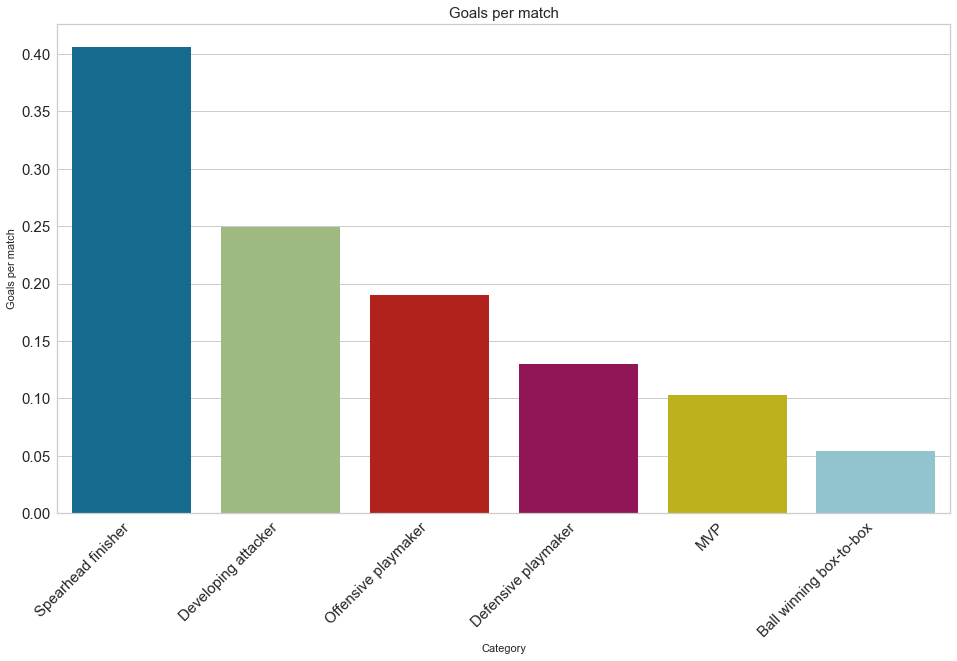

In [133]:
plt.figure(figsize=(16,9))
d = df.groupby('Category')['Goals per match'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=d.loc[:5], x='Category', y=d['Goals per match'], errwidth=False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.title('Goals per match', fontsize=15)
plt.show()

In [122]:
d.loc[:1]

,Category,Goals per match
0,Spearhead finisher,0.405833
1,Developing attacker,0.249091


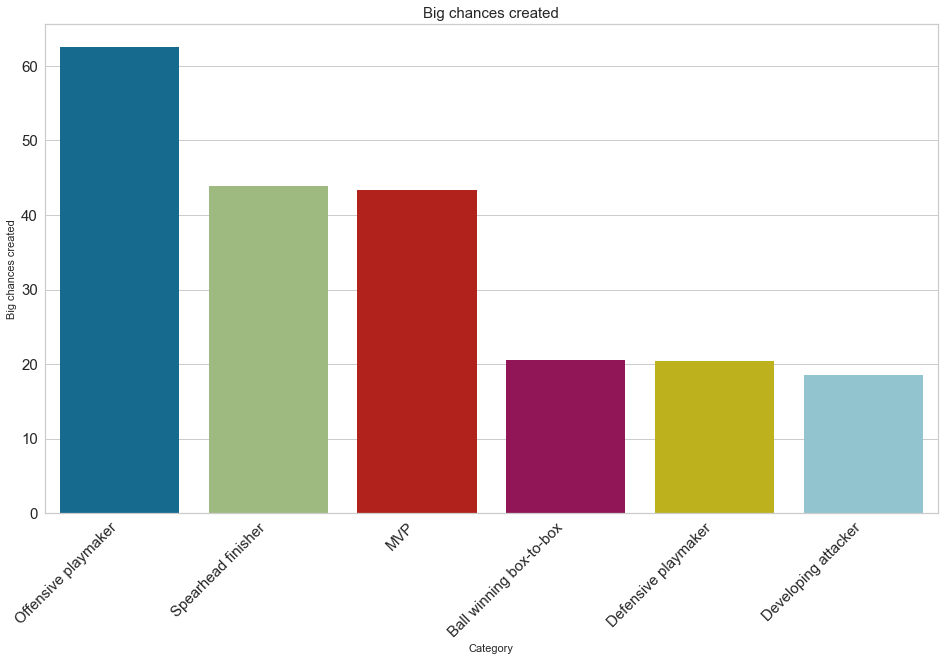

In [136]:
plt.figure(figsize=(16,9))
d = df.groupby('Category')['Big chances created'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=d.loc[:5], x='Category', y=d['Big chances created'], errwidth=False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.title('Big chances created', fontsize=15)
plt.show()

In [83]:
df.loc[df['labels'] == 4]

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,clusters,Category
29,Wayne Hennessey,Crystal-Palace,Goalkeeper,Wales,33.0,181,47,94,0,NaN,...,2094.704203,5360.566324,7022.280944,7513.371455,10895.860499,6182.975357,3483.265205,14200.374674,5,Top performing goalkeeper
59,Kasper Schmeichel,Leicester-City,Goalkeeper,Denmark,33.0,211,91,69,0,NaN,...,2094.287320,5360.145984,7021.774465,7512.945245,10895.420238,6182.554059,3482.760384,14199.933640,5,Top performing goalkeeper
94,David de Gea,Manchester-United,Goalkeeper,Spain,29.0,314,174,66,0,NaN,...,2093.958174,5359.829795,7020.410991,7512.651905,10895.131260,6182.257877,3481.457239,14199.620590,5,Top performing goalkeeper
126,Hugo Lloris,Tottenham-Hotspur,Goalkeeper,France,33.0,262,153,56,0,NaN,...,2094.113182,5359.964295,7021.065880,7512.810890,10895.303809,6182.429156,3482.157658,14199.823933,5,Top performing goalkeeper
127,Joe Hart,Tottenham-Hotspur,Goalkeeper,England,33.0,340,169,97,0,NaN,...,2094.028076,5359.899209,7019.669235,7512.731165,10895.221016,6182.331430,3480.827829,14199.695920,5,Top performing goalkeeper
143,Lukasz Fabianski,West-Ham-United,Goalkeeper,Poland,35.0,246,91,104,0,NaN,...,2094.202393,5360.079072,7020.793644,7512.880397,10895.362048,6182.480161,3481.855338,14199.855269,5,Top performing goalkeeper


In [141]:
fig = px.scatter(df,y="Last man tackles",x="Passes per match",color='Category',hover_name='Name',title="K-mean clustering of Last man tackles VS Passes per match")
fig.update_traces(textposition='bottom left')
fig.show()

In [142]:
fig = px.scatter(df,x="Assists",y="Goals",color='Category',hover_name='Name',title="K-mean clustering of Assists VS Goals")
fig.update_traces(textposition='bottom left')
fig.show()

In [143]:
fig = px.scatter(df,x='Tackles',y='Clearances',color='Category',hover_name='Name',title="K-mean clustering of Tackles VS Clearances")
fig.update_traces(textposition='bottom left')
fig.show()

In [152]:
fig = px.scatter(df,x='Through balls',y='Big chances created',color='Category', hover_name='Name', title="K-mean clustering of Through balls VS Big chances created")
fig.update_traces(textposition='bottom left')
fig.show()

In [145]:
fig = px.scatter(df,x='Fouls',y='Tackles',color='Category',hover_name='Name', title="K-mean clustering of Fouls VS Tackles")
fig.update_traces(textposition='bottom left')
fig.show()

In [147]:
fig = px.scatter(df,x='Crosses',y='Tackles',color='Category',hover_name='Name', title="K-mean clustering of Crosses VS Tackles")
fig.update_traces(textposition='bottom left')
fig.show()

In [168]:
fig = px.scatter(df,x='Big chances created',y='Assists',color='Category',hover_name='Name', title="K-mean clustering of Assists VS BCC")
fig.update_traces(textposition='bottom left')
fig.show()

In [167]:
fig = px.scatter(df,x='Fouls',y='Yellow cards',color='Category',hover_name='Name', title="K-mean clustering of Yellow cards VS Fouls")
fig.update_traces(textposition='bottom left')
fig.show()

In [166]:
fig = px.scatter(df,x='Big chances created',y='Goals',color='Category',hover_name='Name', title="K-mean clustering of Goals VS BCC")
fig.update_traces(textposition='bottom left')
fig.show()

In [173]:
fig = px.scatter(df,x='Saves',y='Accurate long balls',color='Category',hover_name='Name', title="K-mean clustering of Saves VS ALB")
fig.update_traces(textposition='bottom left')
fig.show()